In [2]:
import pandas as pd

try: 
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully.")
    print(f"Shape of dataset: {df.shape}")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found. Please ensure the file is in the correct directory")
except Exception as e:
    print(f"An error occured while loading the dataset: {e}")

Dataset loaded successfully.
Shape of dataset: (284807, 31)

First 5 rows of the dataset:
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [3]:
print("\n--- Dataset Information ---")
df.info()


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

In [4]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  1.175161e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [6]:
print("\n--- Class Distribution ---")
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True)*100)


--- Class Distribution ---
Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [7]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df['Amount'] = scalar.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scalar.fit_transform(df['Time'].values.reshape(-1, 1))

print("\n--- After Feature Scaling (first 5 rows of 'Time' and 'Amount') ---")
print(df[['Time', 'Amount']].head())


--- After Feature Scaling (first 5 rows of 'Time' and 'Amount') ---
       Time    Amount
0 -1.996583  0.244964
1 -1.996583 -0.342475
2 -1.996562  1.160686
3 -1.996562  0.140534
4 -1.996541 -0.073403


In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
print("\n--- Before SMOTE ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Class distribution in y_train before SMOTE: \n{y_train.value_counts()}")


--- Before SMOTE ---
Shape of X_train: (227845, 30)
Shape of y_train: (227845,)
Class distribution in y_train before SMOTE: 
Class
0    227451
1       394
Name: count, dtype: int64


In [13]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n--- After SMOTE ---")
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")
print(f"Class distribution in y_train_resampled after SMOTE:\n{y_train_resampled.value_counts()}")


--- After SMOTE ---
Shape of X_train_resampled: (454902, 30)
Shape of y_train_resampled: (454902,)
Class distribution in y_train_resampled after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [16]:
!nvidia-smi

Sun Aug 24 00:20:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.08                 Driver Version: 581.08         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              8W /   80W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

print("\n--- Training Logistic Regression Model ---")
log_model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")


--- Training Logistic Regression Model ---
Model training complete.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]


--- Model Evaluation ---

Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



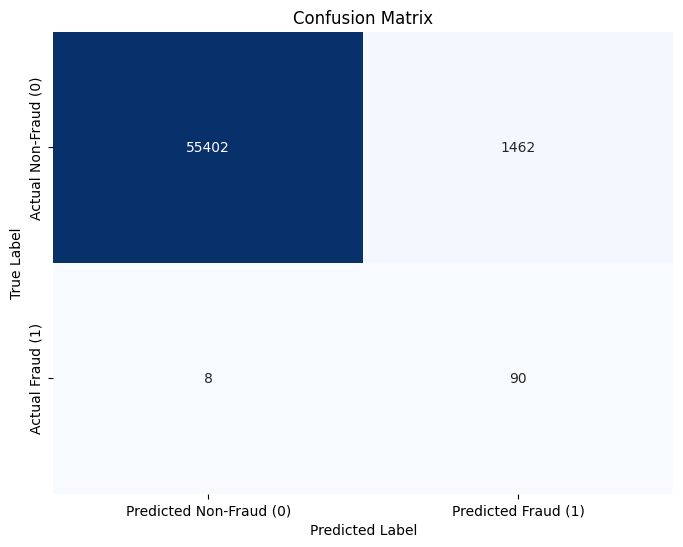

In [19]:
print("\n--- Model Evaluation ---")

print("\nClassification Report ---")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud (0)', 'Predicted Fraud (1)'],
            yticklabels=['Actual Non-Fraud (0)', 'Actual Fraud (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

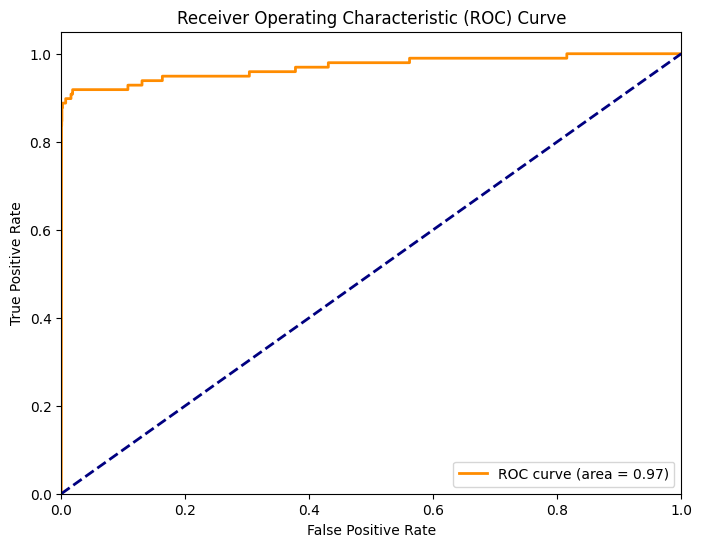

In [20]:
# 3. ROC Curve and AUC
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [21]:
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


ROC AUC Score: 0.9699


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=1
)

In [23]:
print("\n--- Starting Hyperparameter Tuning for Logistic Regression ---")

grid_search.fit(X_train_resampled, y_train_resampled)
print("Hyperparameter tuning complete!")


--- Starting Hyperparameter Tuning for Logistic Regression ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Hyperparameter tuning complete!



Best parameters found: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Best ROC AUC score on training data: 0.9916

--- Evaluating Best Logistic Regression Model on Test Set ---

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



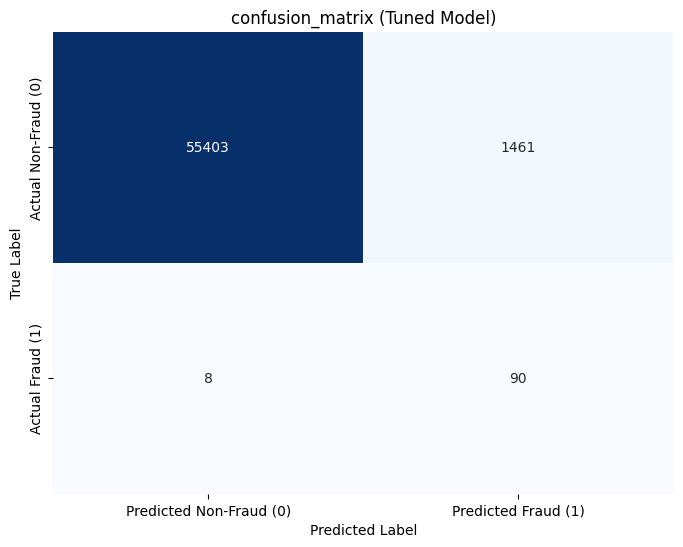

In [26]:
print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"\nBest ROC AUC score on training data: {grid_search.best_score_:.4f}")

best_lr_model = grid_search.best_estimator_

print("\n--- Evaluating Best Logistic Regression Model on Test Set ---")
y_pred_tuned = best_lr_model.predict(X_test)
y_proba_tuned = best_lr_model.predict_proba(X_test)[:, 1]

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud (0)', 'Predicted Fraud (1)'],
            yticklabels=['Actual Non-Fraud (0)', 'Actual Fraud (1)'])
plt.title('confusion_matrix (Tuned Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
print(f"\nROC AUC Score (Tuned Model): {roc_auc_score(y_test, y_proba_tuned):.4f}")


ROC AUC Score (Tuned Model): 0.9699


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

print("\n--- Training Random Forest Classifier ---")
rf_model.fit(X_train_resampled, y_train_resampled)
print("Random Forest model training complete.")


--- Training Random Forest Classifier ---
Random Forest model training complete.



--- Evaluating Random Forest Classifier ---

Classification Report (Random Forest Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



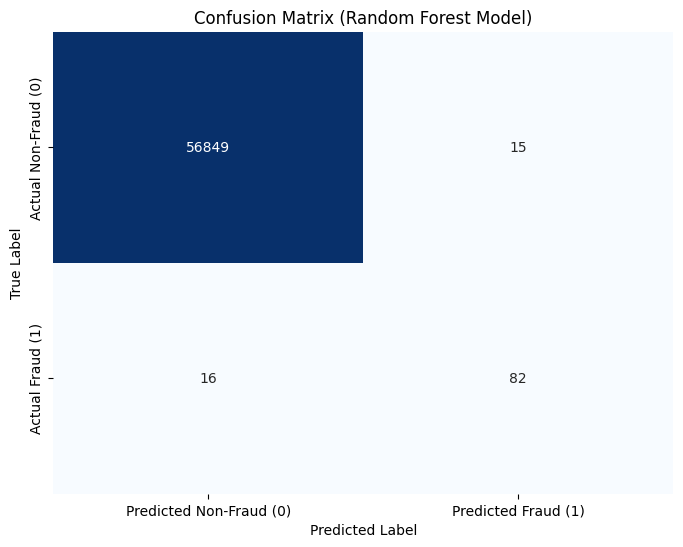

In [28]:
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n--- Evaluating Random Forest Classifier ---")

print("\nClassification Report (Random Forest Model):")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Fraud (0)', 'Predicted Fraud (1)'],
            yticklabels=['Actual Non-Fraud (0)', 'Actual Fraud (1)'])

plt.title("Confusion Matrix (Random Forest Model)")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [29]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

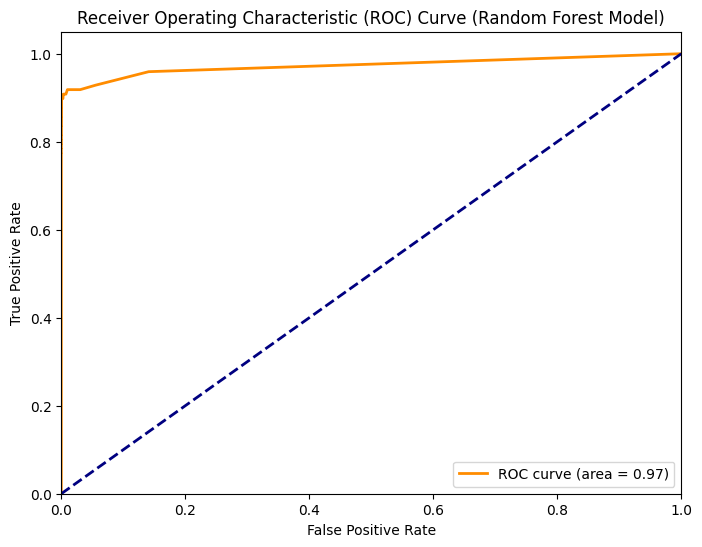


ROC AUC Score (Random Forest Model): 0.9731


In [31]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest Model)')
plt.legend(loc="lower right")
plt.show()

# 4. ROC AUC Score (numerical value)
print(f"\nROC AUC Score (Random Forest Model): {roc_auc_score(y_test, y_proba_rf):.4f}")

In [32]:
import joblib
import os

model_filename = 'random_forest_fraud_model.joblib'

model_path = os.path.join(
    "C:\\Users\\mohdk\\Desktop\\ML\\Credit-Card-Fraud-Detection", model_filename)

print(f"\n--- Saving the Random Forest Model to {model_path} ---")
joblib.dump(rf_model, model_path)
print("Model saved successfully.")


--- Saving the Random Forest Model to C:\Users\mohdk\Desktop\ML\Credit-Card-Fraud-Detection\random_forest_fraud_model.joblib ---
Model saved successfully.


In [34]:
import joblib
import os
from sklearn.preprocessing import StandardScaler # Import it again to be explicit

# Assuming your scaler object is named 'scalar' from  earlier steps
scaler_filename = 'time_amount_scaler.joblib'
scaler_path = os.path.join("C:\\Users\\mohdk\\Desktop\\ML\\Credit-Card-Fraud-Detection", scaler_filename)

# Save the scaler
print(f"\n--- Saving the StandardScaler to {scaler_path} ---")
joblib.dump(scalar, scaler_path) # Using 'scalar' as identified from your notebook
print("StandardScaler saved successfully.")


--- Saving the StandardScaler to C:\Users\mohdk\Desktop\ML\Credit-Card-Fraud-Detection\time_amount_scaler.joblib ---
StandardScaler saved successfully.


In [35]:
# Find the first fraudulent transaction (Class = 1)
fraudulent_transaction = df[df['Class'] == 1].iloc[0]       

# Extract only the feature columns (V1-V28, Time, Amount)   
# Exclude the 'Class' column
fraudulent_features = fraudulent_transaction.drop('Class').values.tolist()

print("\n--- Scaled Features of a Known Fraudulent Transaction ---")
print(fraudulent_features)
print(f"Number of features: {len(fraudulent_features)}")   


--- Scaled Features of a Known Fraudulent Transaction ---
[-1.9880335064229064, -2.3122265423263, 1.95199201064158, -1.60985073229769, 3.9979055875468, -0.522187864667764, -1.42654531920595, -2.53738730624579, 1.39165724829804, -2.77008927719433, -2.77227214465915, 3.20203320709635, -2.89990738849473, -0.595221881324605, -4.28925378244217, 0.389724120274487, -1.14074717980657, -2.83005567450437, -0.0168224681808257, 0.416955705037907, 0.126910559061474, 0.517232370861764, -0.0350493686052974, -0.465211076182388, 0.320198198514526, 0.0445191674731724, 0.177839798284401, 0.261145002567677, -0.143275874698919, -0.35322939296682354]
Number of features: 30


In [36]:
import json
import os

# Define the path for the JSON file
frontend_app_dir ="C:\\Users\\mohdk\\Desktop\\ML\\Credit-Card-Fraud-Detection\\frontend_app"
json_file_path = os.path.join(frontend_app_dir,
'sample_transactions.json')

# Get a few non-fraudulent transactions
non_fraud_samples = df[df['Class'] == 0].sample(2,        
random_state=42)
non_fraud_features = []
for i, (index, row) in enumerate(non_fraud_samples.iterrows()):
    features = row.drop('Class').values.tolist()
    non_fraud_features.append({
        "name": f"Non-Fraudulent Sample {i+1}",
        "features": features
    })

# Get a few fraudulent transactions
fraud_samples = df[df['Class'] == 1].sample(2,
random_state=42)
fraud_features = []
for i, (index, row) in enumerate(fraud_samples.iterrows()):
    features = row.drop('Class').values.tolist()
    fraud_features.append({
        "name": f"Fraudulent Sample {i+1}",
        "features": features
    })

# Combine all samples
all_samples = {
    "non_fraudulent": non_fraud_features,
    "fraudulent": fraud_features
}

# Save to JSON file
with open(json_file_path, 'w') as f:
    json.dump(all_samples, f, indent=4)

print(f"\n--- Sample transactions saved to {json_file_path} ---")


--- Sample transactions saved to C:\Users\mohdk\Desktop\ML\Credit-Card-Fraud-Detection\frontend_app\sample_transactions.json ---
